In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_iris()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_svm = SVC(kernel='rbf')

model_svm.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
y_pred_svm = model_svm.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred_svm)


1.0

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/home/ayushz/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


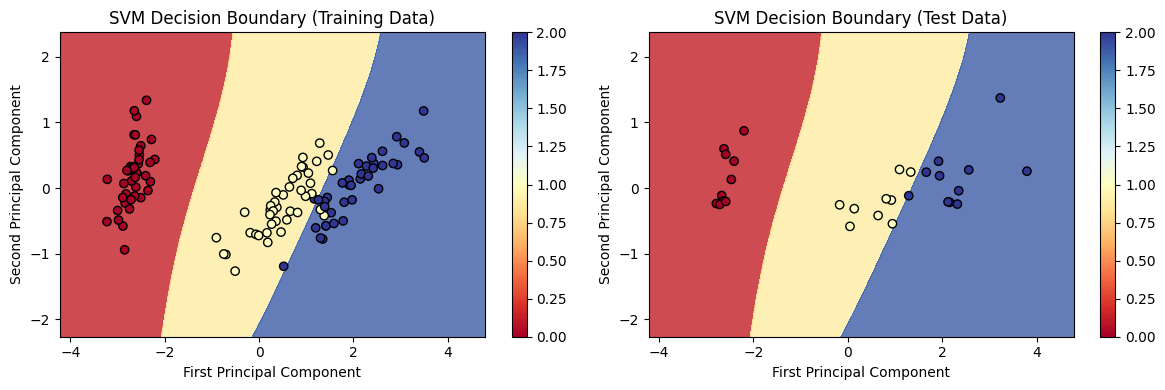

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (2D plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on reduced data for visualization
svm_vis = SVC(kernel='rbf', C=1.0)
svm_vis.fit(X_train_pca, y_train)

# Create a mesh for decision boundary
h = 0.01
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the mesh
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.colorbar(scatter)
plt.title('SVM Decision Boundary (Training Data)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.colorbar(scatter)
plt.title('SVM Decision Boundary (Test Data)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()

Comparing different SVM kernels:
----------------------------------------
LINEAR Kernel - Accuracy: 1.0000
POLY Kernel - Accuracy: 1.0000
RBF Kernel - Accuracy: 1.0000
SIGMOID Kernel - Accuracy: 0.3000

Best kernel: linear with accuracy: 1.0000


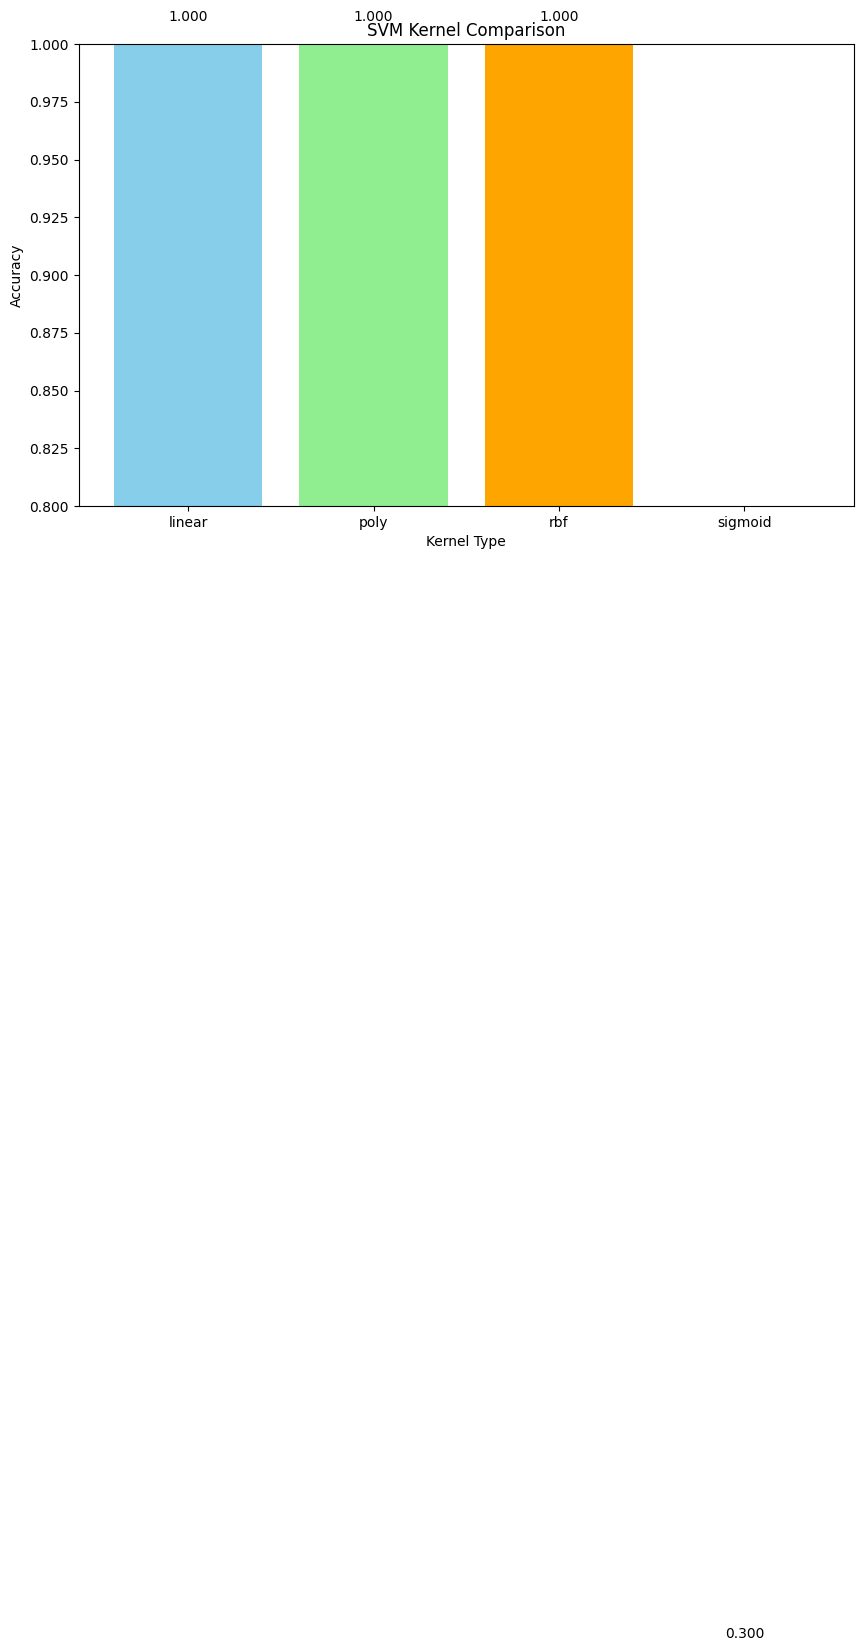

In [19]:
# Compare different SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

print("Comparing different SVM kernels:")
print("-" * 40)

for kernel in kernels:
    # Train SVM with different kernel
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    
    print(f"{kernel.upper()} Kernel - Accuracy: {accuracy:.4f}")

print(f"\nBest kernel: {max(results, key=results.get)} with accuracy: {max(results.values()):.4f}")

# Plot kernel comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
for i, (kernel, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center')
plt.show()

In [20]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

print("Performing hyperparameter tuning...")

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    SVC(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Test the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Test accuracy with best parameters: {best_accuracy:.4f}")

Performing hyperparameter tuning...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/ayushz/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/ayushz/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/ayushz/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/ayushz/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/ayushz/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.


Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation score: 0.9583
Test accuracy with best parameters: 1.0000


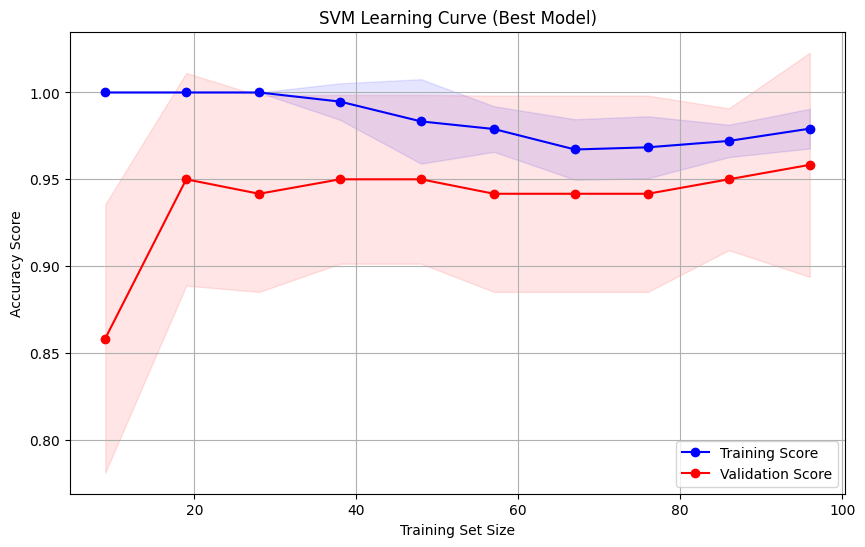

In [21]:
# Learning curves to analyze model performance
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curve for the best SVM model
plot_learning_curve(best_svm, 'SVM Learning Curve (Best Model)', X_train, y_train)

In [22]:
# Final model summary and predictions
print("="*50)
print("FINAL SVM MODEL SUMMARY")
print("="*50)

print(f"Dataset: Iris (150 samples, 4 features, 3 classes)")
print(f"Train/Test Split: 80%/20%")
print(f"Best Model: SVM with {best_svm.kernel} kernel")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Final Test Accuracy: {best_accuracy:.4f}")

# Feature names for reference
print(f"\nFeature names:")
for i, name in enumerate(data.feature_names):
    print(f"  {i}: {name}")

print(f"\nTarget classes:")
for i, name in enumerate(data.target_names):
    print(f"  {i}: {name}")

# Make predictions on some sample data
print(f"\nSample Predictions:")
print("-" * 30)

# Get a few test samples
sample_indices = [0, 5, 10, 15, 20, 25]
for idx in sample_indices:
    if idx < len(X_test):
        sample = X_test.iloc[idx:idx+1]
        actual = data.target_names[y_test.iloc[idx]]
        predicted = data.target_names[best_svm.predict(sample)[0]]
        confidence = max(best_svm.decision_function(sample)[0])
        
        print(f"Sample {idx+1}: Actual={actual}, Predicted={predicted}, Confidence={confidence:.2f}")

print(f"\nModel is ready for making predictions on new iris flower data!")

FINAL SVM MODEL SUMMARY
Dataset: Iris (150 samples, 4 features, 3 classes)
Train/Test Split: 80%/20%
Best Model: SVM with poly kernel
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Final Test Accuracy: 1.0000

Feature names:
  0: sepal length (cm)
  1: sepal width (cm)
  2: petal length (cm)
  3: petal width (cm)

Target classes:
  0: setosa
  1: versicolor
  2: virginica

Sample Predictions:
------------------------------
Sample 1: Actual=versicolor, Predicted=versicolor, Confidence=2.28
Sample 6: Actual=setosa, Predicted=setosa, Confidence=2.23
Sample 11: Actual=virginica, Predicted=virginica, Confidence=2.25
Sample 16: Actual=versicolor, Predicted=versicolor, Confidence=2.28
Sample 21: Actual=setosa, Predicted=setosa, Confidence=2.23
Sample 26: Actual=virginica, Predicted=virginica, Confidence=2.27

Model is ready for making predictions on new iris flower data!
